# UT analysis and determination of CKM parameters

In [1]:
import arviz as az
import numpy as np
import pymc as pm
import pytensor.tensor as at

az.style.use("arviz-darkgrid")

In [2]:
with pm.Model() as model:
    a = pm.Normal("a", mu=0, sigma=100)
    lamda = pm.Exponential("lamda", scale=1)
    rho = pm.Exponential("rho", scale=1)
    eta = pm.Exponential("eta", scale=1)

In [3]:
deg_to_rad = 2*np.pi/360
with model:
    vub0 = a * lamda ** 3 * pm.math.sqrt(rho ** 2 + eta ** 2)
    vcb0 = a * lamda ** 2
    beta0 = at.arctan(eta / (1 - rho))
    gamma0 = at.arctan(eta / rho)
    alpha0 = np.pi - gamma0 - beta0
    
    
    vub = pm.Normal("vub", mu=vub0, sigma=0.00023, observed=0.00372)
    vcb = pm.Normal("vcb", mu=vcb0, sigma=0.0011, observed=0.0405)
    lamda_obs = pm.Normal("lambda_obs", mu=lamda, sigma=0.00089, observed=0.22574)
    gamma =  pm.Normal("gamma", mu=gamma0, sigma=700*deg_to_rad, observed=4.2*deg_to_rad)
    sin2beta =  pm.Normal("sin2beta", mu=at.sin(2*beta0), sigma=0.689, observed=0.018)
    alpha =  pm.Normal("alpha", mu=alpha0, sigma=93*deg_to_rad, observed=6*deg_to_rad)

In [4]:
with model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, lamda, rho, eta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 158 divergences after tuning. Increase `target_accept` or reparameterize.


In [5]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

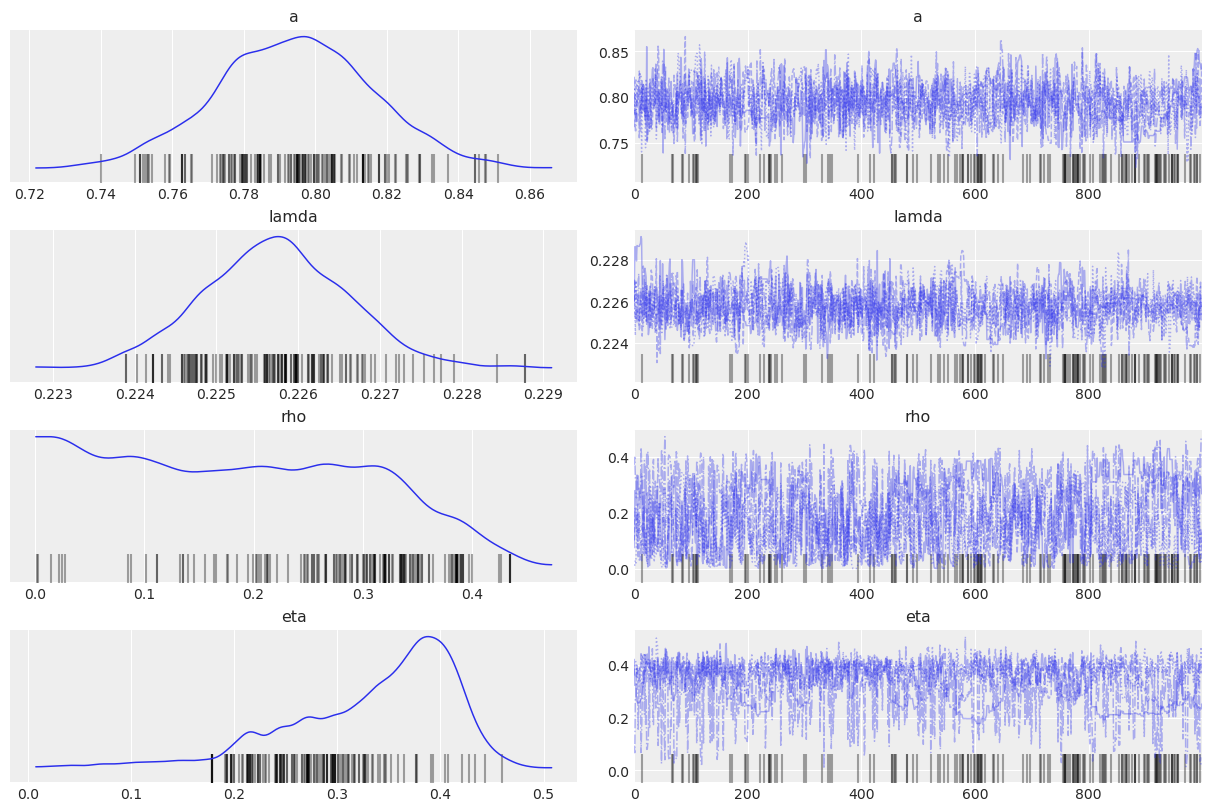

In [6]:
az.plot_trace(trace, combined=True);